# **COMP 2211 Exploring Artificial Intelligence** #
## Lab 3 K-Nearest Neighbors Classifier ##
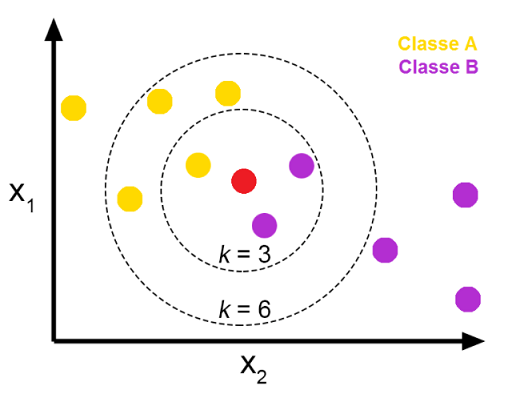

# Before We Begin ##

Run the code in the following two code cells to "mount" the Google Drive directory.

## Mount Google Drive
Create a new folder named *lab3* in your Google Drive. Download and save a copy of the Notebook *lab3_tasks.ipynb* and the CSV files (i.e. *adult.csv* and *y_pred.csv*) to your Google Drive folder *lab3*.

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
%cd "/content/drive/My Drive/lab3"

# Task 1: Data Loading and Pre-processing

## Pandas
[Pandas](https://pandas.pydata.org/) is an open-source library, which provides high-performance, fast, easy-to-use data structures, and data analysis tools for manipulating numeric data and time series. In Pandas, we can import data from various file formats like *JSON*, *SQL*, *Microsoft Excel*, etc.

### Pandas vs. Numpy
In previous labs, we practised Numpy a lot, while in this task, we used Pandas to load the data. So, what are the differences between Pandas and Numpy? And which one is preferable?

In general, the powerful tools of **Pandas** are **Data frame and Series**, whereas the powerful tool of **Numpy** is **Arrays**. The basic idea of choice between them is that:
- When we work on **tabular data**, we prefer the **Pandas** module.
- When we work on **numerical data**, we prefer the **Numpy** module.

Next, we will load the *csv*-format data by calling the *read_csv()* function of Pandas.

In [1]:
import numpy as np # Importing for potential future use
import pandas as pd
data = pd.read_csv('adult.csv', index_col=False)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,no
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,no
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,no
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,no
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,no
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,yes
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,no
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,no


From the above, we can see the content of the dataset. In total, 32561 samples contain 14 attributes and a final prediction goal attribute. This dataset targets to predict whether income exceeds $50K/yr based on census data. It is also known as the "Census Income" dataset.

In [2]:
data.iloc[14]

age                               40
workclass                    Private
fnlwgt                        121772
education                  Assoc-voc
education-num                     11
marital-status    Married-civ-spouse
occupation              Craft-repair
relationship                 Husband
race              Asian-Pac-Islander
sex                             Male
capital-gain                       0
capital-loss                       0
hours-per-week                    40
native-country                   NaN
>50k                             yes
Name: 14, dtype: object

In [3]:
data.iloc[14:15]
# iloc is a purely integer-location based indexing for selection by position, 
# but in order to show the target row in a dataframe structure, 
# better to use iloc[position:position+1] instead of iloc[position]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50k
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,yes


There are missing values in this dataset. An example is illustrated above. To remove NaN values in the dataframe, we replace them with the average value (taking the average to prevent the attribute with NaN value from being assigned a significant value that dominates the prediction).

In [4]:
for k in data.keys():
  if(type(data[k][0])==str):
    # ffill means forward fill that fill the NaN entry with the last seen items within the same attribute column (contrastively, bfill means backward fill)
    data[k].ffill(inplace=True)
  else:
    # here fill the NaN entry with the mean value of the attribute column
    data[k].fillna(data[k].mean(), inplace=True)
data.iloc[13:16]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50k
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,no
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,yes
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,no


## Task 1.1: Create the Vector Representation for Data
Within the 14 attributes, the attributes with text values need to be converted into int type to create the vector representation for each data sample **<font color="green">(a TODO here)</font>**.

Hint: You may use scikit-learn's *preprocessing.LabelEncoder*.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [5]:
# TODO: convert the data from str to integer numbers
# you can use your own method to process, e.g. the LabelEncoder function introduced in the lecture
# target result is stated in below cell


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50k
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


## Task 1.2: Split the Vector Representation and Target Label
The dataframe can now be converted into a NumPy array. Then, we will need to split the data into the vector representation X that doesn't contain the target goal and the target ground truth y **<font color="green">(a TODO here)</font>**.

In [6]:
# vector representation X in shape (32561, 14)
# ground truth y in shape (32561,)
# TODO: assign X and y
X = 
print('X.shape:', X.shape)
y = 
print('y.shape:', y.shape)

X.shape: (32561, 14)
y.shape: (32561,)


## Task 1.3: Standardization

Standardization will be performed on X to prevent attributes with large values like fnlwgt from dominating the prediction **<font color="green">(a TODO here)</font>**.

Hint: We can evaluate the sample mean as $\mu_x=\frac 1n \sum_{i=1}^n{x_i}$, and

the sample standard deviation as $\sigma_x=\sqrt{{\sum_{i=1}^n (x_i-\mu_x)^2}/{(n-1)}}$.

Then, we can standardize any feature value $x_i$ as follows:

### $x^{new}_i = \frac{x_i - \mu_x}{\sigma_x}$.

In [7]:
# TODO: standardization need to be performed for different attributes for the attribute corresponding mean and sd

means = 
sds =
X = 
print(means[0], sds[0])

# Disclaimer: Typically, standardizing categorical attributes is avoided since Euclidean distance may not be meaningful. 
# For simplicity, this task standardizes all attributes, including categorical ones.
# FYI, our experiments indicate that including the "standardized" categorical attributes can somehow improve KNN performance over removing or binary encoding these attributes.

38.58164675532078 13.640432553581341


For your self-checking, the mean and sd for the 1st attribute are 38.58164675532078 and 13.640432553581341.

## Split Training and Testing Set
The vectorized data will then be split into a training and testing set for further processing.

In the code below, we show you how to use scikit-learn's *train_test_split()* method to randomly assign the samples to the test or train set.



In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# test_size: data is split into train and test set in ratio of 8:2
# random_state: this control the shuffle applied to the data before applying the split, 
# in order to do the final checking, a fix value of 3 is passed here to make the output reproducible.

# Task 2: KNN Classifier
Next, we model the data using KNN and predict y_pred using the X_test data using K=5. **<font color="green">(a TODO here)</font>**

Hint: You may use scikit-learn's *neighbors.KneighborsClassifier*, or do it from scratch.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [10]:
# TODO: KNN classification
import numpy as np
# Import additional libraries/modules here.

def knn_classify_sklearn(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, n_neighbors=5) -> np.ndarray:
    '''
    X_train: numpy array of shape (N, d), where N is the number of training samples, d is the number of features.
    
    y_train: numpy array of shape (N, ).
    
    X_test: numpy array of shape (M, d), where M is the number of testing samples, d is the number of features.
    
    Returns: numpy array of shape (M, ) that predicts the labels of X_test based on KNN.
    
    Here are some useful functions of scikit-learn classifiers for your reference: fit(), fit_transform(), predict().
    '''
    pass

# Optional Task: Implement a KNN classfier from scratch
def knn_classify_scratch(X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, n_neighbors=5) -> np.ndarray:
    '''
    Here are some useful functions for your reference: np.expand_dims, np.linalg.norm, np.argsort, np.take, scipy.stats.mode.
    
    ** Note that the naive algorithm using numpy may run for ~2 minutes (O(k*N*d) time), while scikit-learn uses some advanced algorithms for faster nearest neighbor search (O(k*log(N)) time).
    
    ** See reference: https://towardsdatascience.com/k-nearest-neighbors-computational-complexity-502d2c440d5
    
    ** So, please be patient. The result of the naive algorithm is expected to be the same as those of scikit-learn.
    
    ** We will release the solution of this optional task after PA1.
    '''
    return np.zeros(X_test.shape[0]) # delete this line when you work on this task

y_pred = knn_classify_sklearn(X_train, y_train, X_test)
is_diff = not np.allclose(y_pred, knn_classify_scratch(X_train, y_train, X_test))
print(f"Your implementation of KNN from scratch is {'in'*is_diff}correct!")
print("Prediction result of scikit-learn classifier:")
y_pred

Your implementation of kNN from scratch is correct!
Prediction result of scikit-learn classifier:


array([1, 1, 1, ..., 0, 1, 0])

## Evaluation Metrics
The performance of the KNN classifier can be evaluated using the F1 metric:

>$ \text{F1 score} = \frac{2}{1/recall+1/precision} = 2 ⋅ \frac{recall \cdot precision}{recall + precision}$

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png width="400"> </img>

While,
>$Accuracy = \frac{\text{True Positive}+\text{True Negative}}{(\text{True Positive}+\text{True Negative}+\text{False Positive}+\text{False Negative})}$

The accuracy doesn't consider the data distribution, so when there are imbalanced classes, we may still get a high accuracy score even though the model makes a poor prediction on one class. So, the F1 metric is more commonly used to prevent this issue.

You can refer to this Supplementary Note on evaluation metrics (https://course.cse.ust.hk/comp2211/notes/supp-model-evaluation-full.pdf), which includes the definition of True Positive, True Negative, False Positive, and False Negative.

You can check out https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9 for further explanation and an example illustration.


## Imbalanced Class Distribution
Our dataset is also an example of an imbalanced class distribution.

In [11]:
# value_counts: it counts the occurance of unique values
data['>50k'].value_counts()

>50k
no     24720
yes     7841
Name: count, dtype: int64

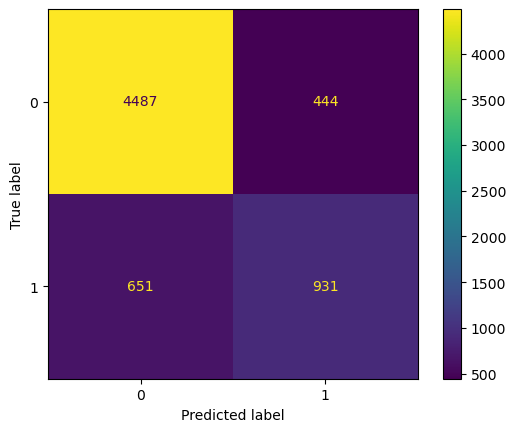

In [12]:
# confusion_matrix: return array containing [[True Negative, False Positive],
#                                            [False Negative, True Positive]]
import matplotlib.pyplot as plt
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [13]:
# f1_score = 2 * (recall * precision)/(recall + precision)
metrics.f1_score(y_test, y_pred)

0.6296922556645249

In [14]:
metrics.accuracy_score(y_test, y_pred)

0.831874712114233

Self-checking of the predicted result:

In [15]:
import pandas as pd
TA_y_pred = pd.read_csv('y_pred.csv', header=None).to_numpy()

In [16]:
(TA_y_pred==y_pred).all() # see if y_pred is the same and return True

True

# Unmount Google Drive

In [ ]:
drive.flush_and_unmount()